## Data observe

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook

In [15]:
data = pd.read_hdf('data/milestone4/open0.h5', mode='r')

In [19]:
data['index'] = np.int32(range(data.shape[0]))

data['event_id'] = data['event_id'].astype(np.int32)
data['signal'] = data['signal'].astype(np.bool)
data['data_ind'] = data['data_ind'].astype(np.int32)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698798 entries, 0 to 698797
Data columns (total 9 columns):
TX          698798 non-null float32
TY          698798 non-null float32
X           698798 non-null float32
Y           698798 non-null float32
Z           698798 non-null float32
event_id    698798 non-null int32
signal      698798 non-null bool
data_ind    698798 non-null int32
index       698798 non-null int32
dtypes: bool(1), float32(5), int32(3)
memory usage: 27.3 MB


In [21]:
data.head()

,TX,TY,X,Y,Z,event_id,signal,data_ind,index
0,-0.121689,0.357254,66494.796875,74176.140625,25860.0,-999,False,0,0
1,0.040179,-0.107180,47274.550781,37472.406250,18102.0,-999,False,0,1
2,0.228571,0.223065,49311.167969,71490.804688,63357.0,-999,False,0,2
3,-0.099237,-0.138337,57166.726562,55747.062500,29739.0,-999,False,0,3
4,0.222805,0.130636,54455.746094,30725.843750,28446.0,-999,False,0,4


In [22]:
def drow_brick(data, signal=None):
    plt.figure(figsize=(16, 4))
    for i, axis in zip([1, 2], ['X','Y']):
        plt.subplot(1, 2, i)
        if (signal):
            plt.scatter(data[data.signal == signal].Z, data[data.signal == signal][axis])
        else:
            plt.scatter(data.Z, data[axis])

        plt.title('EM shower')
        plt.xlabel('Z')
        plt.ylabel(axis)

    plt.show()

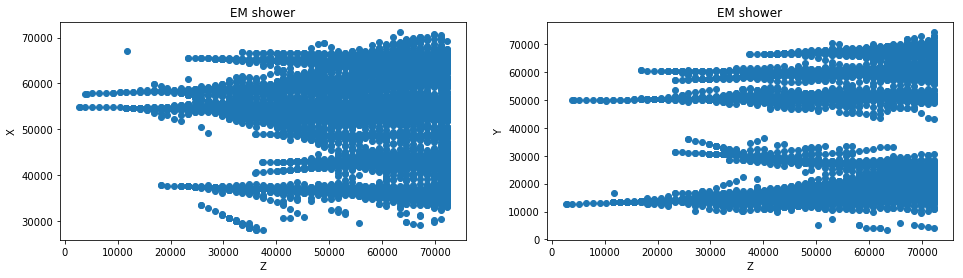

In [31]:
drow_brick(data, signal=True)

In [26]:
def draw_tan(data):
    plt.figure(figsize=(14, 4))
    
    for i, axis in zip([1, 2], ['TX','TY']):
        plt.subplot(1, 2, i)
        plt.hist(data[data.signal == True]['TY'].dropna(), bins=50, histtype="step", normed=True)
        plt.hist(data[data.signal == False]['TY'].dropna(), bins=50, histtype="step", normed=True)
        plt.title(axis + ' hist')
        plt.legend(['signal','background'])

    plt.show()

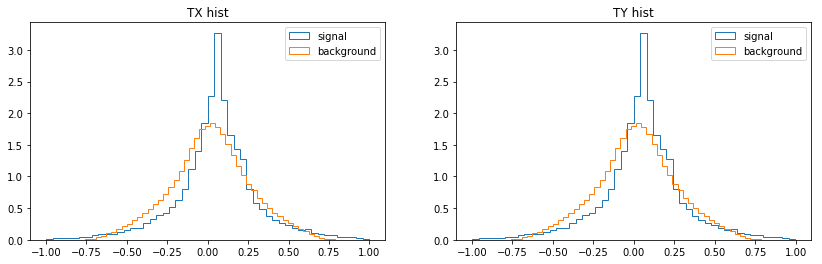

In [27]:
draw_tan(data)

In [28]:
def draw_axes(data):
    plt.figure(figsize=(18, 4))
    
    for i, axis in zip([1, 2, 3], ['X','Y','Z']):
        plt.subplot(1, 3, i)
        plt.hist(data[data.signal == True][axis], bins=58, histtype="step", normed=True)
        plt.hist(data[data.signal == False][axis], bins=58, histtype="step", normed=True)
        plt.title(axis + ' hist')
        plt.legend(['signal','background'])

    plt.show()

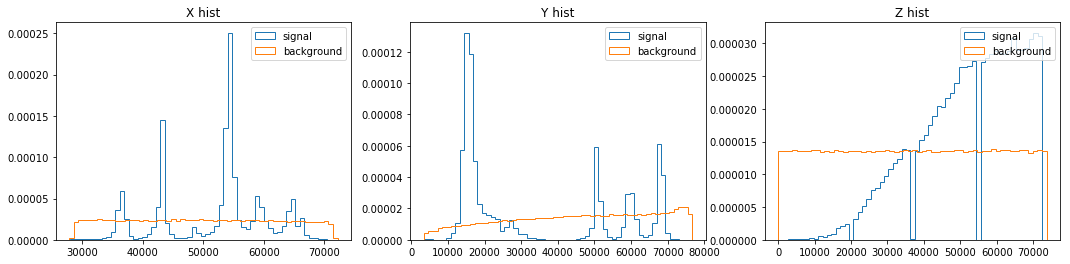

In [29]:
draw_axes(data)

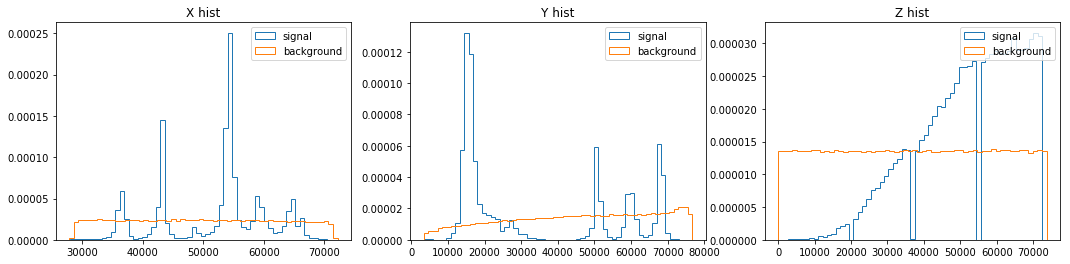

In [30]:
draw_axes(data)

## New features

In [151]:
#data = pd.read_hdf('data/milestone4/open10.h5', mode='r')
#data0 = pd.read_hdf('data/milestone4/test_close0.h5', mode='r')
data = pd.read_hdf('data/milestone4/test_close10.h5', mode='r')

In [54]:
np.unique(data.data_ind)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [152]:
num_pic = 10

In [153]:
#data['index'] = np.int32(range(data.shape[0])) #700818
data['index'] = np.int32(range(700818, 7698899)) 
data = data[(data.data_ind == num_pic) & (data.Z % 1293 == 0)]

In [154]:
#data['event_id'] = data['event_id'].astype(np.int32)
#data['signal'] = data['signal'].astype(np.bool)
data['data_ind'] = data['data_ind'].astype(np.int32)

In [58]:
data.tail()

,TX,TY,X,Y,Z,data_ind,index
705172,-0.339077,0.202979,54454.609375,77671.179688,54306.0,1,1405990
705173,-0.052269,-0.404353,92051.218750,70988.296875,43962.0,1,1405991
705174,0.047828,-0.120281,36903.773438,57858.242188,68529.0,1,1405992
705175,0.177716,-0.013430,48049.242188,67408.203125,56892.0,1,1405993
705176,0.059719,0.172786,28890.453125,55440.234375,10344.0,1,1405994


In [155]:
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if z0 == zmax:
        efr['dfore'] = (np.float32)(1e6)
    else:
        eto = df.query("Z=={}".format(z0 + dz))
        gfr = efr[["X1", "Y1", "X2", "Y2"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore'] = d.astype(np.float32)
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if z0 == zmin:
        eto['dback'] = (np.float32)(1e6)
    else:
        efr = df.query("Z=={}".format(z0 - dz))
        gfr = efr[["X1", "Y1", "X2", "Y2"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gto.apply(dmin, axis=1, args=(gfr.values,))
        eto['dback'] = d.astype(np.float32)
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features(df):
    dx = df['TX'] * dz
    dy = df['TY'] * dz
    df['X1'] = df['X'] + dx
    df['Y1'] = df['Y'] + dy
    df['X2'] = df['X1'] + dx
    df['Y2'] = df['Y1'] + dy
    return df.groupby("Z").apply(ddmin, df)

In [156]:
zl = np.unique(data['Z'])
zmin = np.min(zl)
zmax = np.max(zl)
dz = np.diff(zl)[0]
print('zmin = {}'.format(zmin))
print('zmax = {}'.format(zmax))
print('len(zl) = {}'.format(len(zl)))
print('dz = {}'.format(dz))

zmin = 0.0
zmax = 73701.0
len(zl) = 58
dz = 1293.0


In [157]:
%time data_extended = features(data)

CPU times: user 1min 50s, sys: 208 ms, total: 1min 50s
Wall time: 1min 50s


In [158]:
dz2 = dz*2
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if (z0 == zmax) or (z0 == (zmax - 1293)):
        efr['dfore2'] = (np.float32)(1e6)
    else:
        eto = df.query("Z=={}".format(z0 + dz2))
        gfr = efr[["X2", "Y2", "X3", "Y3"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore2'] = d.astype(np.float32)
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if (z0 == zmin) or (z0 == (zmin + 1293)):
        eto['dback2'] = (np.float32)(1e6)
    else:
        efr = df.query("Z=={}".format(z0 - dz2))
        gfr = efr[["X2", "Y2", "X3", "Y3"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gto.apply(dmin, axis=1, args=(gfr.values,))
        eto['dback2'] = d.astype(np.float32)
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features_2_layer(df):
    dx = df['TX'] * dz
    dy = df['TY'] * dz
    #df['X1'] = df['X'] + dx
    #df['Y1'] = df['Y'] + dy
    #df['X2'] = df['X1'] + dx
    #df['Y2'] = df['Y1'] + dy
    
    df['X3'] = df['X2'] + dx
    df['Y3'] = df['Y2'] + dy
    
    return df.groupby("Z").apply(ddmin, df)


%time data_extended2 = features_2_layer(data_extended)

CPU times: user 1min 48s, sys: 124 ms, total: 1min 48s
Wall time: 1min 48s


In [159]:
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if (z0 == zmax):
        efr['dfore_simp'] = (np.float32)(1e6)
    else:
        eto = df.query("Z=={}".format(z0 + dz))
        gfr = efr[["X1", "Y1"]]
        gto = eto[["X", "Y"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore_simp'] = d.astype(np.float32)
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if (z0 == zmin):
        eto['dback_simp'] = (np.float32)(1e6)
    else:
        efr = df.query("Z=={}".format(z0 - dz))
        gfr = efr[["X1", "Y1"]]
        gto = eto[["X", "Y"]]
        d = gto.apply(dmin, axis=1, args=(gfr.values,))
        eto['dback_simp'] = d.astype(np.float32)
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features_simp(df):
    return df.groupby("Z").apply(ddmin, df)


%time data_extended3 = features_simp(data_extended2)

CPU times: user 1min 18s, sys: 160 ms, total: 1min 18s
Wall time: 1min 18s


In [ ]:
data_extended3.info()

In [349]:
data_extended3.head()

,TX,TY,X,Y,Z,data_ind,index,X1,Y1,X2,Y2,dfore,dback,X3,Y3,dfore2,dback2,dfore_simp,dback_simp
4913000,0.032682,0.001637,33329.046875,45709.785156,15516.0,8,5613817,33371.304688,45711.902344,33413.562500,45714.019531,606548.062500,162819.50000,33455.820312,45716.136719,3.889101e+05,168392.53125,214533.093750,20230.628906
4913001,0.075558,-0.292736,40998.109375,29701.566406,55599.0,8,5613818,41095.804688,29323.058594,41193.500000,28944.550781,244159.734375,281761.81250,41291.195312,28566.042969,3.829907e+05,660103.18750,7602.037109,12887.770508
4913002,-0.160324,0.312165,58496.679688,71954.109375,73701.0,8,5613819,58289.382812,72357.742188,58082.085938,72761.375000,1000000.000000,481576.31250,57874.789062,73165.007812,1.000000e+06,337076.09375,1000000.000000,209786.921875
4913003,0.334896,-0.314555,84209.351562,19539.511719,31032.0,8,5613820,84642.375000,19132.791016,85075.398438,18726.070312,332944.468750,884669.18750,85508.421875,18319.349609,2.016408e+06,287981.06250,2170.766357,169729.093750
4913004,-0.209747,0.368397,76537.914062,26630.697266,64650.0,8,5613821,76266.710938,27107.033203,75995.507812,27583.369141,644783.187500,161536.53125,75724.304688,28059.705078,1.853726e+05,376198.59375,194383.171875,72766.984375


In [160]:
#data_extended3.to_hdf('data/milestone4/open{}_extended3.h5'.format(num_pic), 'key_to_store', mode='w')
data_extended3.to_hdf('data/milestone4/close{}_extended3.h5'.format(num_pic), 'key_to_store', mode='w')

In [161]:
num_pic

10

## CatBoost

In [203]:
data0 = pd.read_hdf('data/milestone4/open0_extended3.h5', mode='r')
data1 = pd.read_hdf('data/milestone4/open1_extended3.h5', mode='r')
data2 = pd.read_hdf('data/milestone4/open2_extended3.h5', mode='r')
data3 = pd.read_hdf('data/milestone4/open3_extended3.h5', mode='r')
data4 = pd.read_hdf('data/milestone4/open4_extended3.h5', mode='r')
data5 = pd.read_hdf('data/milestone4/open5_extended3.h5', mode='r')
data6 = pd.read_hdf('data/milestone4/open6_extended3.h5', mode='r')
data7 = pd.read_hdf('data/milestone4/open7_extended3.h5', mode='r')
data8 = pd.read_hdf('data/milestone4/open8_extended3.h5', mode='r')
data9 = pd.read_hdf('data/milestone4/open9_extended3.h5', mode='r')
data10 = pd.read_hdf('data/milestone4/open10_extended3.h5', mode='r')

In [204]:
data = pd.concat([data0, data1[data1.signal == True], data2[data2.signal == True], 
                         data3[data3.signal == True], data4[data4.signal == True], 
                         data5[data5.signal == True], data6[data6.signal == True],
                         data7[data7.signal == True], data8[data8.signal == True],
                         data9[data9.signal == True], data10[data10.signal == True]])

In [7]:
from catboost import CatBoostClassifier

/opt/conda/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


In [205]:
model = CatBoostClassifier(iterations=500, depth=8, learning_rate=1,
                           loss_function='CrossEntropy', logging_level='Verbose', random_seed=42, verbose=True)

#%time model.fit(X_train.values, y_train)
%time model.fit(data.drop(['event_id','signal','data_ind','index'], axis=1).values, data.signal)

Borders generated
0:	learn 0.5189966197passed: 0.289 sec	total: 39.8s	remaining: 5h 31m 12s
1:	learn 0.418186894passed: 0.313 sec	total: 40.1s	remaining: 2h 46m 34s
2:	learn 0.3542085526passed: 0.285 sec	total: 40.4s	remaining: 1h 51m 36s
3:	learn 0.3118746143passed: 0.289 sec	total: 40.7s	remaining: 1h 24m 8s
4:	learn 0.2816020568passed: 0.29 sec	total: 41s	remaining: 1h 7m 39s
5:	learn 0.259596875passed: 0.423 sec	total: 41.4s	remaining: 56m 50s
6:	learn 0.242808936passed: 0.298 sec	total: 41.7s	remaining: 48m 58s
7:	learn 0.229584411passed: 0.276 sec	total: 42s	remaining: 43m 3s
8:	learn 0.2189049108passed: 0.282 sec	total: 42.3s	remaining: 38m 27s
9:	learn 0.2101355359passed: 0.267 sec	total: 42.6s	remaining: 34m 45s
10:	learn 0.2027478075passed: 0.285 sec	total: 42.8s	remaining: 31m 44s
11:	learn 0.1966019973passed: 0.343 sec	total: 43.2s	remaining: 29m 16s
12:	learn 0.1912082685passed: 0.329 sec	total: 43.5s	remaining: 27m 10s
13:	learn 0.1863473193passed: 0.321 sec	total: 43.8s	

116:	learn 0.1213410603passed: 0.281 sec	total: 1m 13s	remaining: 4m 1s
117:	learn 0.1212146982passed: 0.28 sec	total: 1m 14s	remaining: 3m 59s
118:	learn 0.1211218194passed: 0.29 sec	total: 1m 14s	remaining: 3m 58s
119:	learn 0.1210180858passed: 0.296 sec	total: 1m 14s	remaining: 3m 56s
120:	learn 0.1208966982passed: 0.28 sec	total: 1m 14s	remaining: 3m 54s
121:	learn 0.1208024473passed: 0.281 sec	total: 1m 15s	remaining: 3m 53s
122:	learn 0.1207086752passed: 0.294 sec	total: 1m 15s	remaining: 3m 51s
123:	learn 0.120616718passed: 0.266 sec	total: 1m 15s	remaining: 3m 49s
124:	learn 0.12050743passed: 0.267 sec	total: 1m 16s	remaining: 3m 48s
125:	learn 0.1204115431passed: 0.255 sec	total: 1m 16s	remaining: 3m 46s
126:	learn 0.1202602013passed: 0.272 sec	total: 1m 16s	remaining: 3m 44s
127:	learn 0.1201669071passed: 0.27 sec	total: 1m 16s	remaining: 3m 43s
128:	learn 0.1200329043passed: 0.275 sec	total: 1m 17s	remaining: 3m 41s
129:	learn 0.1199182484passed: 0.274 sec	total: 1m 17s	rema

229:	learn 0.1135008013passed: 0.276 sec	total: 1m 45s	remaining: 2m 3s
230:	learn 0.1134687258passed: 0.275 sec	total: 1m 45s	remaining: 2m 3s
231:	learn 0.1134394071passed: 0.265 sec	total: 1m 45s	remaining: 2m 2s
232:	learn 0.1133884457passed: 0.323 sec	total: 1m 46s	remaining: 2m 1s
233:	learn 0.1133151682passed: 0.325 sec	total: 1m 46s	remaining: 2m 1s
234:	learn 0.1132827202passed: 0.291 sec	total: 1m 46s	remaining: 2m
235:	learn 0.113244041passed: 0.314 sec	total: 1m 47s	remaining: 1m 59s
236:	learn 0.1132188527passed: 0.322 sec	total: 1m 47s	remaining: 1m 59s
237:	learn 0.1131814228passed: 0.264 sec	total: 1m 47s	remaining: 1m 58s
238:	learn 0.1131444562passed: 0.305 sec	total: 1m 48s	remaining: 1m 58s
239:	learn 0.113105159passed: 0.276 sec	total: 1m 48s	remaining: 1m 57s
240:	learn 0.1130615547passed: 0.283 sec	total: 1m 48s	remaining: 1m 56s
241:	learn 0.1130308524passed: 0.274 sec	total: 1m 48s	remaining: 1m 56s
242:	learn 0.1129811658passed: 0.276 sec	total: 1m 49s	remaini

343:	learn 0.1095610229passed: 0.266 sec	total: 2m 17s	remaining: 1m 2s
344:	learn 0.1095372449passed: 0.267 sec	total: 2m 17s	remaining: 1m 1s
345:	learn 0.1095107403passed: 0.271 sec	total: 2m 17s	remaining: 1m 1s
346:	learn 0.1094750788passed: 0.269 sec	total: 2m 18s	remaining: 1m
347:	learn 0.1094633461passed: 0.266 sec	total: 2m 18s	remaining: 1m
348:	learn 0.109415882passed: 0.271 sec	total: 2m 18s	remaining: 60s
349:	learn 0.1093734577passed: 0.261 sec	total: 2m 18s	remaining: 59.5s
350:	learn 0.1093377634passed: 0.263 sec	total: 2m 19s	remaining: 59.1s
351:	learn 0.1093022755passed: 0.269 sec	total: 2m 19s	remaining: 58.6s
352:	learn 0.1092769222passed: 0.273 sec	total: 2m 19s	remaining: 58.2s
353:	learn 0.109253526passed: 0.277 sec	total: 2m 19s	remaining: 57.7s
354:	learn 0.1092373991passed: 0.269 sec	total: 2m 20s	remaining: 57.3s
355:	learn 0.1092079953passed: 0.266 sec	total: 2m 20s	remaining: 56.8s
356:	learn 0.1091819043passed: 0.269 sec	total: 2m 20s	remaining: 56.4s
35

458:	learn 0.1066894325passed: 0.291 sec	total: 2m 50s	remaining: 15.2s
459:	learn 0.1066667737passed: 0.298 sec	total: 2m 50s	remaining: 14.8s
460:	learn 0.1066315229passed: 0.289 sec	total: 2m 50s	remaining: 14.4s
461:	learn 0.1066032244passed: 0.301 sec	total: 2m 51s	remaining: 14.1s
462:	learn 0.1065794341passed: 0.298 sec	total: 2m 51s	remaining: 13.7s
463:	learn 0.1065654247passed: 0.277 sec	total: 2m 51s	remaining: 13.3s
464:	learn 0.1065252508passed: 0.288 sec	total: 2m 51s	remaining: 12.9s
465:	learn 0.106512636passed: 0.443 sec	total: 2m 52s	remaining: 12.6s
466:	learn 0.1064835638passed: 0.293 sec	total: 2m 52s	remaining: 12.2s
467:	learn 0.1064667168passed: 0.279 sec	total: 2m 52s	remaining: 11.8s
468:	learn 0.1064338572passed: 0.277 sec	total: 2m 53s	remaining: 11.4s
469:	learn 0.1064143262passed: 0.281 sec	total: 2m 53s	remaining: 11.1s
470:	learn 0.1063959215passed: 0.273 sec	total: 2m 53s	remaining: 10.7s
471:	learn 0.1063766183passed: 0.272 sec	total: 2m 54s	remaining:

## Open test

In [12]:
from sklearn.metrics import roc_auc_score

In [8]:
data6 = pd.read_hdf('data/milestone4/open6_extended3.h5', mode='r')
data7 = pd.read_hdf('data/milestone4/open7_extended3.h5', mode='r')
data8 = pd.read_hdf('data/milestone4/open8_extended3.h5', mode='r')
data9 = pd.read_hdf('data/milestone4/open9_extended3.h5', mode='r')
data10 = pd.read_hdf('data/milestone4/open10_extended3.h5', mode='r')

In [9]:
data_test = pd.concat([data6, data7, data8, data9, data10])

In [21]:
%time predict = model.predict_proba(data_test.drop(['event_id','signal','data_ind','index'], axis=1).values)[:,1]
%time roc_auc_score(data_test.signal, predict)

CPU times: user 1min 9s, sys: 3.14 s, total: 1min 12s
Wall time: 1min 12s
CPU times: user 1.24 s, sys: 4 ms, total: 1.24 s
Wall time: 1.24 s


0.97535604915987806

0.95375680185860001 iter=20, depth=3, 10% signals
0.97075916276167629 iter=20, depth=8, 10% signals
0.9727042293224768 iter=20, depth=10, 10% signals
0.97535604915987806 

## Close test

In [206]:
data0 = pd.read_hdf('data/milestone4/close0_extended3.h5', mode='r')
data1 = pd.read_hdf('data/milestone4/close1_extended3.h5', mode='r')
data2 = pd.read_hdf('data/milestone4/close2_extended3.h5', mode='r')
data3 = pd.read_hdf('data/milestone4/close3_extended3.h5', mode='r')
data4 = pd.read_hdf('data/milestone4/close4_extended3.h5', mode='r')
data5 = pd.read_hdf('data/milestone4/close5_extended3.h5', mode='r')
data6 = pd.read_hdf('data/milestone4/close6_extended3.h5', mode='r')
data7 = pd.read_hdf('data/milestone4/close7_extended3.h5', mode='r')
data8 = pd.read_hdf('data/milestone4/close8_extended3.h5', mode='r')
data9 = pd.read_hdf('data/milestone4/close9_extended3.h5', mode='r')
data10 = pd.read_hdf('data/milestone4/close10_extended3.h5', mode='r')

In [207]:
df_test = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10 ])

In [164]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698763 entries, 0 to 6998080
Data columns (total 19 columns):
TX            float32
TY            float32
X             float32
Y             float32
Z             float32
data_ind      int32
index         int32
X1            float32
Y1            float32
X2            float32
Y2            float32
dfore         float32
dback         float32
X3            float32
Y3            float32
dfore2        float32
dback2        float32
dfore_simp    float32
dback_simp    float32
dtypes: float32(17), int32(2)
memory usage: 616.7 MB


In [208]:
%time df_test['signal'] = model.predict_proba(df_test.drop(['data_ind','index'], axis=1).values)[:,1]

CPU times: user 2min 16s, sys: 26.1 s, total: 2min 42s
Wall time: 2min 42s


In [258]:
%time df_test['signal'] = model.predict_proba(df_test.drop(['data_ind','index','signal'], axis=1).values)[:,1]

CPU times: user 2min 25s, sys: 22.6 s, total: 2min 48s
Wall time: 2min 48s


In [209]:
result = pd.DataFrame()
result['index'] = range(7698899)

In [210]:
result = pd.merge(result, df_test[['index','signal']], how='left', on='index')
result = result.fillna(1.0)

In [211]:
result = result.rename(columns={'index': 'id'})

In [200]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698899 entries, 0 to 7698898
Data columns (total 2 columns):
id        int64
signal    float64
dtypes: float64(1), int64(1)
memory usage: 176.2 MB


In [201]:
result.head()

,id,signal
0,0,0.015941
1,1,0.003924
2,2,0.006338
3,3,0.014327
4,4,0.002171


In [212]:
result.to_csv('~/data/milestone4/result.csv', index=False)

public: 0.97141 privat: 0.96776